## Simple example of classification

In [ ]:
# Useful imports
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


[Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), 
Data Set Characteristics:
* Number of Instances: 569
* Number of Attributes: 30 numeric, predictive attributes and the class
* Attribute Information:
    1) radius (mean of distances from center to points on the perimeter)
    2) texture (standard deviation of gray-scale values)
    3) perimeter
    4) area
    5) smoothness (local variation in radius lengths)
    6) compactness (perimeter^2 / area - 1.0)
    7) concavity (severity of concave portions of the contour)
    8) concave points (number of concave portions of the contour)
    9) symmetry
    10) fractal dimension (“coastline approximation” - 1)
    11) The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.

* Class:
  * WDBC-Malignant
  * WDBC-Benign





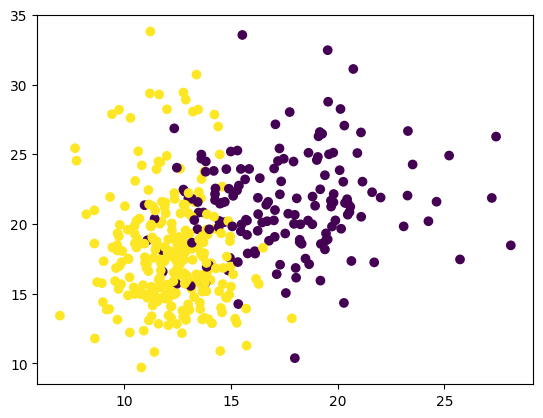

In [19]:
# Load dataset
(X, Y) = load_breast_cancer(return_X_y=True)

# Split dataset in train set and test set  
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, train_size=426, test_size=143, random_state=0)

# Visualize train set elements
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)


In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, input_shape=[30]),
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                496       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


![](img/model_graph.png)

Text(0.5, 1.0, 'Accuracy graph')

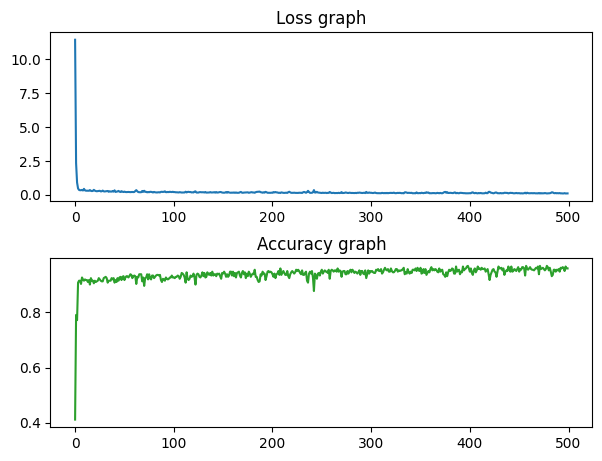

In [4]:
# Complier settings
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.binary_accuracy])

# Train model
model.fit(x_train,y_train, epochs=500, verbose=0)

# Loss and accuracy graphs
fig, axs = plt.subplots(2)
fig.tight_layout(pad=2)
axs[0].set_title("Loss graph")
axs[0].plot(range(500), model.history.history['loss'], 'tab:blue')
axs[1].plot(range(500), model.history.history['binary_accuracy'], 'tab:green')
axs[1].set_title("Accuracy graph")


In [5]:
#Make predictions
predictions = model.predict(x_test)

# Turn predictions to boolean values
predictions_class = np.where(predictions[:, 0] >= 0.5, 1, 0)
Counter(predictions_class == y_test)


5/5 [==============================] - 0s 1ms/step


Counter({True: 136, False: 7})

In [49]:
# Accuracy value
acc = tf.keras.metrics.binary_accuracy(y_test, predictions_class).numpy()*100
print("Accuracy: %2.2f" %acc + "%")


Accuracy: 95.10%


Comparison of the two graphs, the first formed by the corrected data from the test dataset and the second with the data predicted by the model

Text(0.5, 1.0, 'Predict values')

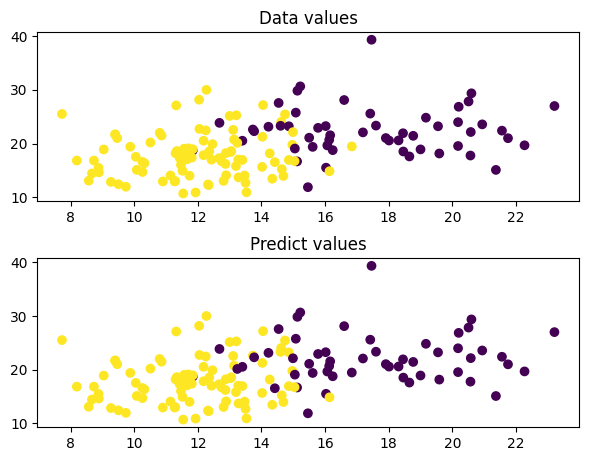

In [27]:
fig, axs = plt.subplots(2)
fig.tight_layout(pad=2)
axs[0].set_title("Data values")
axs[0].scatter(x_test[:, 0], x_test[:, 1], c=y_test)
axs[1].scatter(x_test[:, 0], x_test[:, 1], c=predictions_class)
axs[1].set_title("Predict values")
